In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
data = pd.read_csv('mnist.csv')

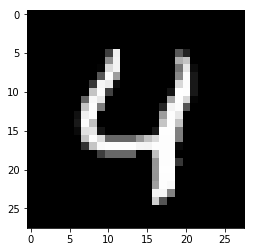

In [3]:
#Showing an example
imageArray = data.iloc[3,1:].values.reshape(28,28)
plt.imshow(imageArray, cmap="Greys_r")
plt.show()

In [4]:
#Converting the pixels to the form (28,28,1)
reshaped_data = data.iloc[:,1:].values.reshape(len(data),28,28,1)

#Converting and storing the labels in y
y = keras.utils.to_categorical(data.iloc[:,0].values,num_classes=10)

#Converting to numpy arrays
df_reshaped_data = np.array(reshaped_data)
df_y = np.array(y)

#Splitting data set to train and test
x_train, x_test, y_train, y_test = train_test_split(df_reshaped_data,df_y,test_size=0.2,random_state=None)


In [5]:
#Creating the CNN
model = Sequential()
model.add(Convolution2D(32,4,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(16,2,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               29000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
__________

In [6]:
#Fitting the model
history = model.fit(x_train,y_train,validation_split=0.2, epochs=10)



Train on 6399 samples, validate on 1600 samples
Epoch 1/10
6399/6399 [==============================] - 3s 422us/step - loss: 14.4342 - acc: 0.1017 - val_loss: 13.0433 - val_acc: 0.1819
Epoch 2/10
6399/6399 [==============================] - 2s 369us/step - loss: 13.3365 - acc: 0.1666 - val_loss: 10.8755 - val_acc: 0.3169
Epoch 3/10
6399/6399 [==============================] - 2s 385us/step - loss: 8.9417 - acc: 0.4137 - val_loss: 4.0032 - val_acc: 0.7156
Epoch 4/10
6399/6399 [==============================] - 3s 404us/step - loss: 3.0090 - acc: 0.7517 - val_loss: 0.9082 - val_acc: 0.9044
Epoch 5/10
6399/6399 [==============================] - 2s 373us/step - loss: 1.2120 - acc: 0.8673 - val_loss: 0.6269 - val_acc: 0.9219
Epoch 6/10
6399/6399 [==============================] - 2s 382us/step - loss: 0.8390 - acc: 0.8912 - val_loss: 0.4447 - val_acc: 0.9306
Epoch 7/10
6399/6399 [==============================] - 2s 372us/step - loss: 0.5756 - acc: 0.9173 - val_loss: 0.3738 - val_acc: 0.9

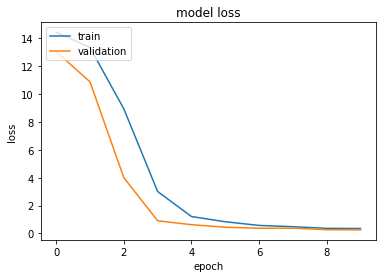

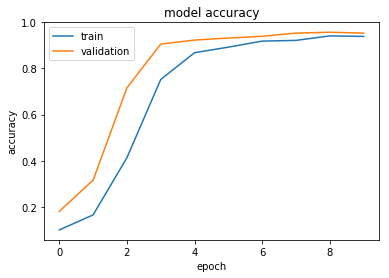

In [7]:
#Ploting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()





#Plotting Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
#Testing 
model.evaluate(x_test,y_test)


2000/2000 [==============================] - 0s 156us/step


[0.3631790563139366, 0.946]

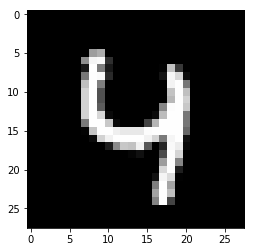

prediction: 4
label: 4


In [12]:
##### Trying a specific example (4)
num_ex = 120
pic = x_test[num_ex,:,:].flatten().reshape(28,28)
plt.imshow(pic, cmap="Greys_r")
plt.show()

prediction = model.predict(np.array([x_test[num_ex]]))

print'prediction: {!r}'.format(np.argmax(prediction))
print'label: {!r}'.format(np.argmax(y_test[num_ex]))



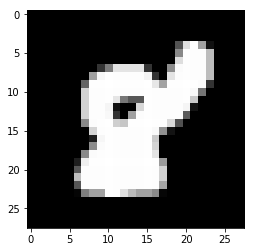

prediction: 8
label: 8


In [15]:
##### Trying a specific example (1)
num_ex = 123
pic = x_test[num_ex,:,:].flatten().reshape(28,28)
plt.imshow(pic, cmap="Greys_r")
plt.show()

prediction = model.predict(np.array([x_test[num_ex]]))

print'prediction: {!r}'.format(np.argmax(prediction))
print'label: {!r}'.format(np.argmax(y_test[num_ex]))

